In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pystan
import pickle
import phasekickstan as p
import h5py
import phasekick
import pmefm
from glob import glob
import lockin
import os
from scipy.optimize import curve_fit, root
from scipy import optimize
from tqdm import tqdm
idx = pd.IndexSlice
from collections import OrderedDict



In [127]:
df = pd.read_csv('../results/pk-efm/151217-201951-p1sun-phasekick.csv')

In [128]:
df_d = df[df.expt == 'data']

In [155]:
mpl.rc('font', size=9)
with mpl.rc_context({'text.usetex': True}):
    fig = plt.figure(figsize=(1., 1.))
    plt.plot(df_d.tp*1e3, df_d['dphi_corrected [cyc]']*1e3, '.')
#     plt.ylim(-0.25, 0.05)
    plt.yticks(np.arange(-200, 1, 100))
    plt.xlim(0, 20)
    plt.ylim(-200, 50)
    plt.xticks([0, 10, 20])
    plt.ylabel('$\\Delta \\phi \\: \\: [\\mathrm{mcyc.}]$')
    plt.xlabel('$t_{\\mathrm{p}} \\: \\: [\\mathrm{ms}]$')

In [157]:
fig.savefig('/Users/ryandwyer/Dropbox/_JAM_MS__Dwyer201511__Phasekick__figs/raw-figures/single-delta-phase.pdf',
           bbox_inches='tight', transparent=True)

In [111]:
fig, ax = plt.subplots()
plt.plot(df_d.tp*1e3, df_d['dphi_corrected [cyc]']/df_d.tp, '.')


In [112]:
dphi_avg = (df_d['dphi_corrected [cyc]'].values[0::4] + df_d['dphi_corrected [cyc]'].values[1::4] +
df_d['dphi_corrected [cyc]'].values[2::4] + df_d['dphi_corrected [cyc]'].values[3::4])/4

In [113]:
tp_avg = 250*(df_d.tp.values[0::4] + df_d.tp.values[1::4] + df_d.tp.values[2::4] + df_d.tp.values[3::4]) 

In [114]:
plt.plot(df_d.tp*1e3)

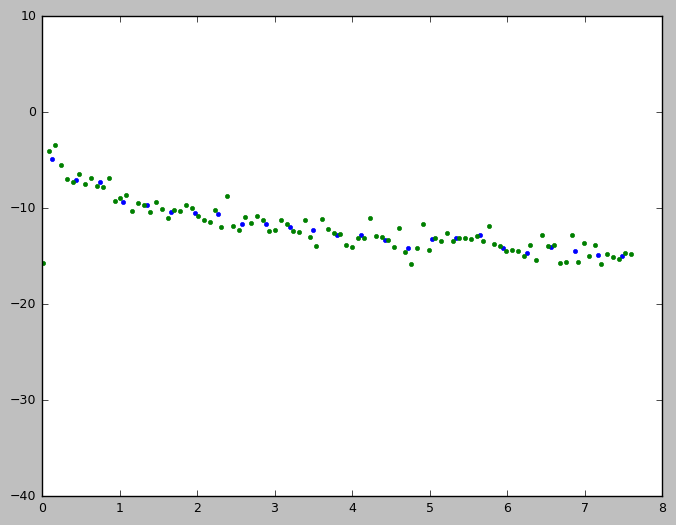

In [120]:
fig = plt.figure()
plt.plot(tp_avg, dphi_avg/tp_avg*1000, 'b.')
plt.plot(df_d.tp.values*1e3, df_d['dphi_corrected [cyc]'].values/df_d.tp.values, 'g.')
plt.ylim(-40, 10)
fig

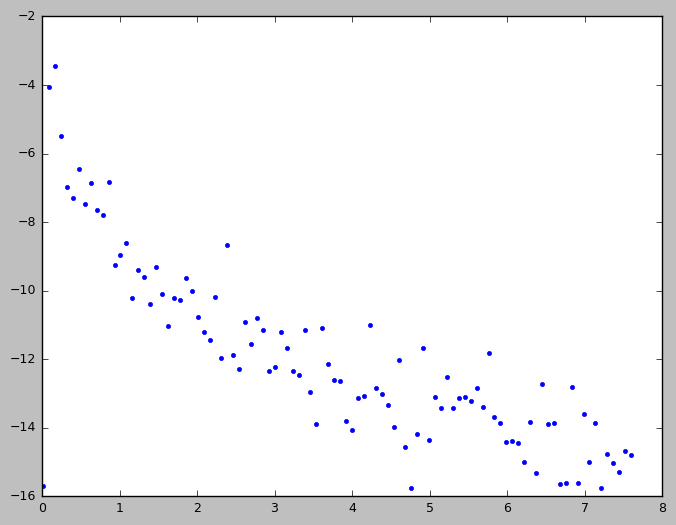

In [118]:
fig = plt.figure()
fig